<img src="https://gitlab.irit.fr/toc/ens-n7/texCoursN7/-/raw/main/LOGO_INP_N7.png" alt="N7" height="80"/>

<img src="https://gitlab.irit.fr/toc/ens-n7/texCoursN7/-/raw/main/logo-insa.png" alt="INSA" height="80"/>

# Méthodes de Runge-Kutta implicites - TP Projet

- Date : 2023-2024
- Durée approximative : inconnue

**Nom** : Moshfeghi

**Prénom** : Maxime

## Rendu et consignes

Une fois le travail terminé, vous enverrez directement le fichier `.ipynb` par email à l'adresse : `olivier.cots@toulouse-inp.fr`.

- **Date limite du rendu : mercredi 15/11/2023 à 23h59.** Attention, à partir de 24h, 2 points est enlevé de la note finale toutes les 30 minutes.
- **Attention :** Le fichier doit être renommé de la façon suivante : `rk_implicites_NOM_Prenom.ipynb`. 4 points enlevés si le nom du fichier n'est pas respecté.
- **Documents autorisés :** vous pouvez utiliser votre polycopié et les TPs précédents.

## Introduction

Nous allons dans ce TP, implémenter quelques méthodes de Runge-Kutta **implicites** (voir **polycopié Section 8.2**) et étudier leur convergence. On considère un pas de temps $h$ uniforme. Une méthode à un pas implicite est convergente si pour toute solution $x(\cdot, t_0, x_0)$ d'un problème de Cauchy, la suite approximante ${(x_i)}_i$ donnée par la méthode à un pas implicite vérifie 
$$
    \max_{1 \le i \le N}\, \|{x(t_i, t_0, x_0) - x_i}\| \to 0 
    \quad\text{quand}\quad h \to 0.
$$

Si la convergence est d'ordre $p$ alors il existe une constante $C \ge 0$ telle que l'**erreur globale** $E$ vérifie

$$
    E := \max_{1 \le i \le N}\, \|{x(t_i, t_0, x_0) - x_i}\| \le C\, h^p.
$$

Faisons l'hypothèse que $E = M\, h^p$ pour un certain $M \ge 0$. En passant au logarithme, on obtient

$$
    \log(E) = \log(M) + p\, \log(h).
$$

Nous en déduisons que si on trace $\log(E)$ en fonction de $\log(h)$, on doit obtenir une droite de pente $p$. C'est ce que nous allons vérifier dans ce TP.

In [1]:
# activate local project
using Pkg
Pkg.activate(".")
#Pkg.instantiate()

# load packages
using LinearAlgebra
using Plots
using Plots.PlotMeasures
using Polynomials

#
px = PlotMeasures.px;

  Activating 

project at `c:\Users\maxim\Documents\ENSEEIHT\Cours SN (général)\2A ModIA\S7 (INSA)\Modélisation et Calcul Scientifique\Calcul différentiel et EDO\TPs`


In [2]:
# Fonctons auxiliaires 


function method_infos(method)

    if method == :euler 
        method_func = euler
        method_name = "Euler"
        methode_stages = 1
    elseif method == :runge 
        method_func = runge
        method_name = "Runge"
        methode_stages = 2
    elseif method == :heun
        method_func = heun
        method_name = "Heun"
        methode_stages = 3
    elseif method == :rk4
        method_func = rk4
        method_name = "RK4"
        methode_stages = 4
    elseif method == :trapezes
        method_func = trapezes
        method_name = "Trapèzes"
        methode_stages = 4
    elseif method == :gauss2
        method_func = gauss2
        method_name = "Gauss à 2 étages"
        methode_stages = 4
    else 
        error("Méthode d'intégration non reconnue")
    end

    return method_func, method_name, methode_stages

end

function convergence(method, f, x0, tspan, sol,  Nspan)

    # Récupération des informations sur la méthode
    method_func, method_name, methode_stages = method_infos(method)
    
    # Ecriture des choix de paramètres
    println("Méthode d'intégration : ", method_name)

    plts  = []           # Liste des graphiques

    for N ∈ Nspan

        # Solution approchée
        ts, xs = method_func(f, x0, tspan, N) # Appel de la méthode d'intégraton

        # Affichage de la solution approchée
        plt = plot(ts, xs, label=method_name, marker=:circle)

        # Affichage de la solution analytique
        plot!(plt, sol, label="Analytic")

        # Mise en forme du graphique
        plot!(plt, xlims=(tspan[1]-0.1, tspan[2]+0.1), ylims=(-0.2, 1.65), 
        title="h=$(round((tspan[2]-tspan[1])/N, digits=2))", titlefont = font(12,"Calibri"),
        xlabel="t", ylabel="x(t)", left_margin=15px, bottom_margin=15px, top_margin=10px, right_margin=15px)

        # Ajout du graphique à la liste des graphiques
        push!(plts, plt)

    end

    return plts

end

xlims_ = (1e-4, 1e0)
ylims_ = (1e-13, 1e1)
xlims_nfe_ = (1e1, 1e4)
ylims_nfe_ = (1e-13, 1e1)

function ordre(method, f, x0, tspan, sol, hspan, nfespan; 
    xlims=xlims_, ylims=ylims_, xlims_nfe=xlims_nfe_, ylims_nfe=ylims_nfe_)

    plts = []           # Liste des graphiques

    #
    plt1 = plot(xaxis=:log, yaxis=:log); push!(plts, plt1)
    plt2 = plot(xaxis=:log, yaxis=:log); push!(plts, plt2)

    #
    plts = ordre(plts, method, f, x0, tspan, sol, hspan, nfespan, 
        xlims=xlims, ylims=ylims, xlims_nfe=xlims_nfe, ylims_nfe=ylims_nfe)

    # Mise en forme des graphiques
    plot!(plts[1], titlefont = font(12, "Calibri"), legend=:topleft,
    xlabel="h", ylabel="Error", left_margin=15px, bottom_margin=15px, top_margin=10px, right_margin=15px)

    plot!(plts[2], titlefont = font(12, "Calibri"), legend=:topright,
    xlabel="Calls to f", ylabel="Error", left_margin=15px, bottom_margin=15px, top_margin=10px, right_margin=15px)

    return plts
    
end

function ordre(plts_in, method, f, x0, tspan, sol, hspan, nfespan; 
    xlims=xlims_, ylims=ylims_, xlims_nfe=xlims_nfe_, ylims_nfe=ylims_nfe_)

    # Copie du graphique d'entrée
    plts = deepcopy(plts_in)

    # Récupération des informations sur la méthode
    method_func, method_name, methode_stages = method_infos(method)
    
    # Ecriture des choix de paramètres
    println("Méthode d'intégration : ", method_name)

    # Les différents nombre de pas de temps
    Nspan = round.(Int, (tspan[2]-tspan[1]) ./ hspan)

    # Calcul de l'erreur
    err = []

    for N ∈ Nspan

        # Solution approchée
        ts, xs = method_func(f, x0, tspan, N)

        # On calcule l'erreur en norme infinie
        push!(err, maximum(abs.(xs .- sol.(ts))))
        
    end

    # calcul par régression linéaire de la pente de la droite et de l'ordonnée à l'origine
    reg = fit(log10.(hspan), log10.(err), 1)
    K   = 10^reg[0]
    p   = reg[1]
    println("\nconstante du grand O : K = $(round(K, digits=5))")
    println("ordre de convergence : p = $(round(p, digits=5))")

    # Affichage de l'erreur en fonction du pas de temps: on enlève la constante K
    plot!(plts[1], hspan, err, xaxis=:log, yaxis=:log, label="$method_name", marker=:circle)

    # Affichage de la droite de régression
    #plot!(plt, hspan, hspan .^ p, label="$method_name Regression", linestyle=:dash)
    
    # Mise en forme du graphique
    plot!(plts[1], xlims=xlims, ylims=ylims)

    # Calcul de l'erreur en fonction du nombre d'appels à la fonction f
    err = []

    for Nfe ∈ Nfespan

        #
        N = round(Int, Nfe / methode_stages)

        # Solution approchée
        ts, xs = method_func(f, x0, tspan, N)

        # On calcule l'erreur en norme infinie
        push!(err, maximum(abs.(xs .- sol.(ts))))
        
    end

    # Affchage de l'erreur en fonction du nombre d'appels à la fonction f
    # Nfespan = methode_stages .* Nspan
    plot!(plts[2], Nfespan, err, xaxis=:log, yaxis=:log, label="$method_name", marker=:circle)

    # Mise en forme du graphique
    plot!(plts[2], xlims=xlims_nfe, ylims=ylims_nfe)

    return plts
    
end;

hspan_   = 10 .^ range(-4, stop=0, length=20)
Nfespan_ = 10 .^ range(0, stop=4, length=20);

## L'exemple d'étude

On s'intéresse (pour les exercices 1, 2 et 3) au problème de Cauchy

$$
    \dot{x}(t) = (1-2t) x(t), \quad x(0) = x_0 = 1
$$

sur l'intervalle $[0, 3]$.

In [3]:
# Définition du problème de Cauchy
f(t, x) = (1-2t)x    # Second membre f(t, x)
x0 = 1.0             # Condition initiale
tspan = (0.0, 3.0);  # Intervalle de temps

In [4]:
# Solution analytique
function sol(t)
    return exp(t-t^2)
end;

In [5]:
# Estimation de la constante de Lipschitz de f sur [0, 3]
# Voir Théorème 8.2.2 pour l'utilité de cette estimation
function dfx(t)
    return 1-2t
end 
L = maximum(abs.(dfx.(range(0, stop=3, length=1000))))

5.0

## La méthode d'Euler implicite

La méthode d'Euler implicite est donnée par :

$$
\left\{
\begin{array}{l}
x_{n+1} = x_n + h f(t_n + h, x_{n+1}) \\
x_0 = x(t_0)
\end{array}
\right.
$$

### Exercice 1

1. Implémenter la méthode d'Euler implicite avec le point fixe (penser à voir le polycopié Section 8.2).
2. Pourquoi si $h \ge 0.2$, la méthode d'Euler implicite ne marche pas ?
3. Tracer la solution approchée et la solution exacte sur le même graphique pour différentes valeurs de $h$ que vous choisirez pour illustrer la convergence de la méthode.
4. Tracer l'erreur globale de la méthode d'Euler implicite en fonction de $h$ et vérifier que l'erreur est bien en $O(h)$.

**Attention** : pour l'algorithme du point fixe, faites attention aux critères d'arrêts (il y en a 2) ! Voir votre polycopié Section 8.2. Vous fixerez la valeur de la tolérance à $10^{-6}$ et le nombre maximum d'itérations à $1000$.

#### Question 1) :

On implémente la méthode d'Euler implicite avec le point fixe.

In [6]:
function GEuler(k, f, xn, tspan, N, n)
    t0, tf = tspan
    h = (tf - t0) / N
    return f(t0 + n*h, xn + h*k)
end;


function GEulerImp(y, f, xn, tspan, N, n)
    t0, tf = tspan
    h = (tf - t0) / N
    #penteIni = f(t[0] + h,x0)
    epsi = 10^(-6)
    while (y - GEuler(y, f, xn, tspan, N, n)) > epsi
        y = GEuler(y, f, xn, tspan, N, n)
    end
    return y
end;


function euler(f, x0, tspan, N)
    t0, tf = tspan
    h = (tf - t0) / N
    t = t0
    x = x0
    ts = [t0]
    xs = [x0]
    for i in 1:N
        y = f(i*h,x)
        y = GEulerImp(y, f, x, tspan, N, i)
        y = x + h * y
        t = t + h
        x = y
        push!(ts, t)
        push!(xs, y)
    end
    return ts, xs
end;

#### Question 2) :

Pour $h \ge 0.2$, la méthode d'Euler implicite ne marche pas car l'erreur est trop grande : l'estimation va diverger (avec mes mots, "on loupe le virage").

#### Question 3) :

On trace la solution estimée avec la méthode d'Euler implicite pour différentes valeurs de $h$ en fonction de la solution exacte.

Méthode d'intégration : Euler


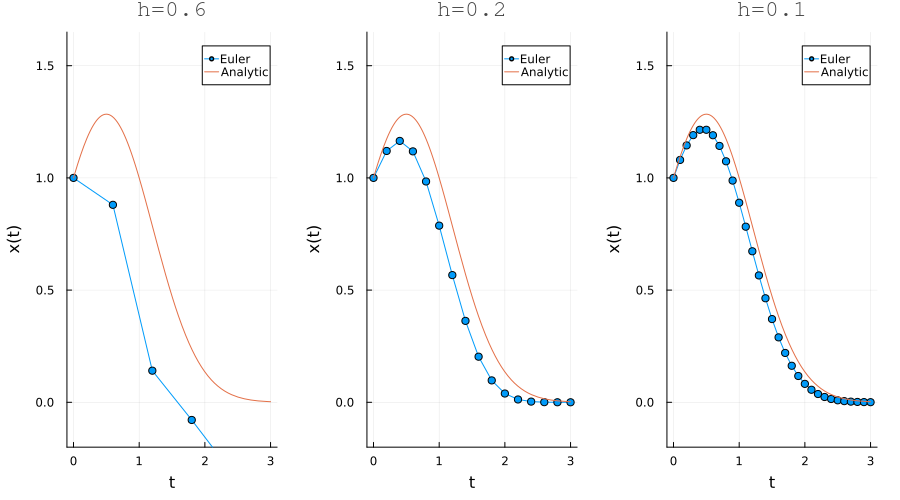

GKS: could not find font Calibri.ttf


In [7]:
# Convergence de la méthode sur l'exemple
method = :euler
Nspan  = [5, 15, 30]

# Calcul des graphiques
plts = convergence(method, f, x0, tspan, sol, Nspan)

# Affichage des graphiques
plot(plts..., layout=(1, length(Nspan)), size=(900, 500))

#### Question 4) :

On trace maintenant l'évolution de l'erreur globale de la méthode en fonction de $h$.

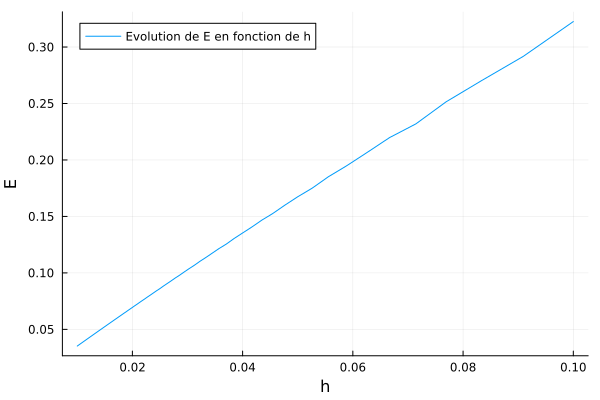

In [8]:
hVectEulerImp = []
errVectEulerImp = []

for I in 10:1:100
    tsI, xsI = euler(f, x0, tspan, I)
    errI = maximum(abs.(xsI - sol.(tsI)))
    push!(hVectEulerImp, 1/I)
    push!(errVectEulerImp, errI)
end

plot(hVectEulerImp, errVectEulerImp, xlabel = "h", ylabel = "E", label = "Evolution de E en fonction de h")

On constate que l'évolution de l'erreur globale de la méthode d'Euler implicite en fonction de h est linéaire : on en déduit que cette erreur est en $O(h)$.

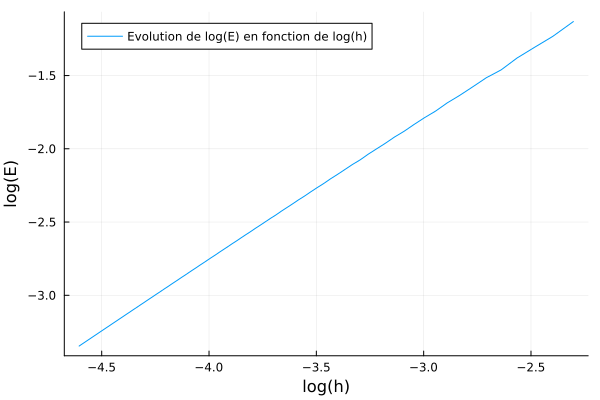

In [9]:
plot(log.(hVectEulerImp), log.(errVectEulerImp), xlabel = "log(h)", ylabel = "log(E)", label = "Evolution de log(E) en fonction de log(h)")

En traçant $\log(E)$ en fonction de $\log(h)$, on constate qu'on a effectivement un coefficient directeur $p = 1$. L'ordre semble donc égal à 1.

## La méthode des trapèzes

La méthode des trapèzes est donnée par le tableau de Butcher :

$$
    \begin{array}{c | c c}
        0       & 0     & 0     \\[0.2em]
        1       & 1/2   & 1/2   \\[0.2em]
        \hline
                & 1/2   & 1/2   \\
    \end{array}
$$

### Exercice 2

1. Implémenter la méthode des trapèzes avec le point fixe.
2. Tracer la solution approchée et la solution exacte sur le même graphique pour différentes valeurs de $h$ que vous choisirez pour illustrer la convergence de la méthode.
3. Tracer l'erreur globale de la méthode des trapèzes. Quel est l'ordre de convergence de la méthode des trapèzes ?

#### Question 1) :

On implémente la méthode des trapèzes avec le point fixe.

In [10]:
function GTrapezes(k, f, xn, tspan, N, n)
    t0, tf = tspan
    h = (tf - t0) / N
    k1, k2 = k
    return f(t0 + n*h, xn), f(t0 + n*h, xn + h*k2)
end;


function GTrapezesImp(kinit, f, xn, tspan, N, n)
    t0, tf = tspan
    h = (tf - t0) / N
    epsi = 10^(-6)
    k = kinit
    while norm((k.-GTrapezes(k, f, xn, tspan, N, n))...) > epsi
        k = GTrapezes(k, f, xn, tspan, N, n)
    end
    return k
end;


function trapezes(f, x0, tspan, N)
    t0, tf = tspan
    h = (tf - t0) / N
    t = t0
    x = x0
    ts = [t0]
    xs = [x0]
    for i in 1:N
        k = f(i*h,x), (1/2)*f(i*h,x)
        k = GTrapezesImp(k, f, x, tspan, N, i)
        k1, k2 = k
        y = x + h * ((1/2)*k1 + (1/2)*k2)
        t = t + h
        x = y
        push!(ts, t)
        push!(xs, y)
    end
    return ts, xs
end;

#### Question 2) :

On trace la solution estimée avec la méthode des trapèzes implicite pour différentes valeurs de $h$ en fonction de la solution exacte.

Méthode d'intégration : Trapèzes


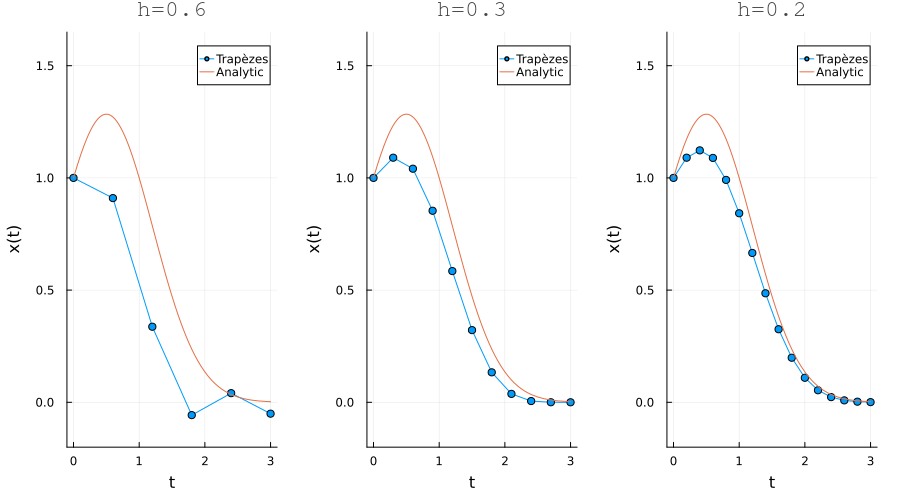

In [11]:
# Convergence de la méthode sur l'exemple
method = :trapezes
Nspan  = [5, 10, 15]

# Calcul des graphiques
plts = convergence(method, f, x0, tspan, sol, Nspan)

# Affichage des graphiques
plot(plts..., layout=(1, length(Nspan)), size=(900, 500))

#### Question 3) :

On trace maintenant l'évolution de l'erreur globale de la méthode en fonction de $h$.

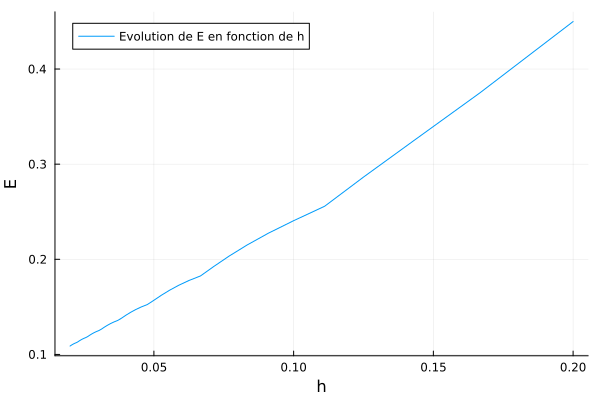

In [12]:
hVectTrapezes = []
errVectTrapezes = []

for I in 5:1:50
    tsI, xsI = trapezes(f, x0, tspan, I)
    errI = maximum(abs.(xsI - sol.(tsI)))
    push!(hVectTrapezes, 1/I)
    push!(errVectTrapezes, errI)
end

plot(hVectTrapezes, errVectTrapezes, xlabel = "h", ylabel = "E", label = "Evolution de E en fonction de h")

On constate que l'erreur globale n'est plus linéaire avec h : pour estimer l'ordre, il est nécessaire donc de tracer $\log(E)$ en fonction de $\log(h)$.

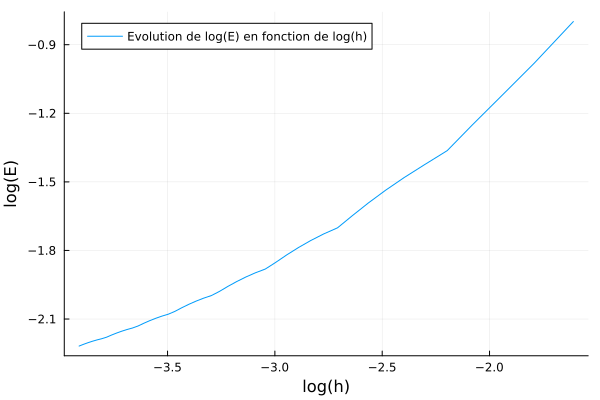

In [13]:
plot(log.(hVectTrapezes), log.(errVectTrapezes), xlabel = "log(h)", ylabel = "log(E)", label = "Evolution de log(E) en fonction de log(h)")

Il est plus difficile d'évaluer l'ordre $p$ pour cette méthode. Par culture générale, on sait que l'ordre de la méthode des trapèzes est 2, mais cela ne concorde pas aux résultats que l'on obtient ici.

## La méthode de Gauss à 2 étages

La méthode de Gauss à 2 étages est donnée par le tableau de Butcher :

$$
    \begin{array}{c | c c}
        1/2 - \sqrt{3}/6     & 1/4  & 1/4 - \sqrt{3}/6  \\[0.2em]
        1/2 + \sqrt{3}/6     & 1/4 + \sqrt{3}/6 & 1/4   \\[0.2em]
        \hline
        & 1/2 & 1/2 \\
    \end{array}
$$

### Exercice 3

1. Implémenter la méthode de Gauss à 2 étages avec le point fixe.
2. Tracer la solution approchée et la solution exacte sur le même graphique pour différentes valeurs de $h$ que vous choisirez pour illustrer la convergence de la méthode.
3. Tracer l'erreur globale de la méthode de Gauss à 2 étages. Quel est l'ordre de convergence de la méthode de Gauss à 2 étages ?

#### Question 1) :

On implémente la méthode de Gauss à 2 étages avec le point fixe.

In [14]:
# Initialisation des constantes du schéma de Gauss à 2 étages

cGauss2 = [(1/2)-sqrt(3)/6, (1/2)+sqrt(3)/6]
bGauss2 = [1/2, 1/2]
AGauss2 = [1/4 (1/4)-sqrt(3)/6 ; (1/4)+sqrt(3)/6 1/4]

c1, c2 = cGauss2
b1, b2 = bGauss2
a11, a12, a21, a22 = AGauss2[1,1], AGauss2[1,2], AGauss2[2,1], AGauss2[2,2]

(0.25, -0.038675134594812866, 0.5386751345948129, 0.25)

In [15]:
function GGauss2(k, f, xn, tspan, N, n)
    t0, tf = tspan
    h = (tf - t0) / N
    k1, k2 = k
    return f(t0 + n*h + c1*h, xn + h*(a11*k1 + a12*k2)), f(t0 + n*h + c2*h, xn + h*(a21*k1 + a22*k2))
end;


function GGauss2Imp(kinit, f, xn, tspan, N, n)
    t0, tf = tspan
    h = (tf - t0) / N
    epsi = 10^(-6)
    k = kinit
    while norm((k.-GGauss2(k, f, xn, tspan, N, n))...) > epsi
        k = GGauss2(k, f, xn, tspan, N, n)
    end
    return k
end;


function gauss2(f, x0, tspan, N)
    t0, tf = tspan
    h = (tf - t0) / N
    t = t0
    x = x0
    ts = [t0]
    xs = [x0]
    for i in 1:N
        k = f(i*h,x), (1/2)*f(i*h,x)
        k = GGauss2Imp(k, f, x, tspan, N, i)
        k1, k2 = k
        y = x + h * ((1/2)*k1 + (1/2)*k2)
        t = t + h
        x = y
        push!(ts, t)
        push!(xs, y)
    end
    return ts, xs
end;

Méthode d'intégration : Gauss à 2 étages


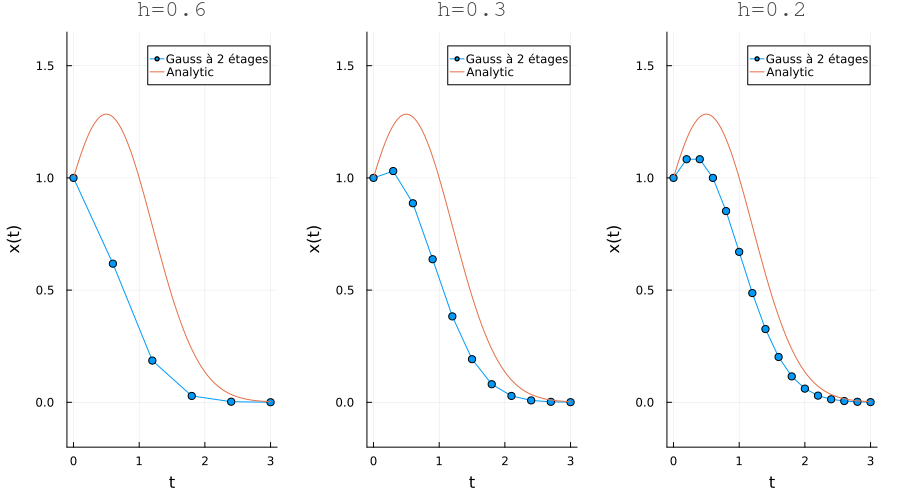

In [16]:
# Convergence de la méthode sur l'exemple
method = :gauss2
Nspan  = [5, 10, 15]

# Calcul des graphiques
plts = convergence(method, f, x0, tspan, sol, Nspan)

# Affichage des graphiques
plot(plts..., layout=(1, length(Nspan)), size=(900, 500))

#### Question 3) :

On trace de même dans un premier temps l'erreur globale en fonction de $h$.

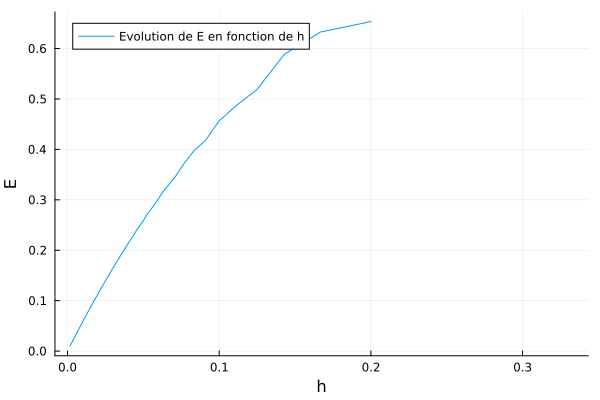

In [17]:
hVectGauss2 = []
errVectGauss2 = []

for I in 3:1:600
    tsI, xsI = gauss2(f, x0, tspan, I)
    errI = maximum(abs.(xsI - sol.(tsI)))
    push!(hVectGauss2, 1/I)
    push!(errVectGauss2, errI)
end

plot(hVectGauss2, errVectGauss2, xlabel = "h", ylabel = "E", label = "Evolution de E en fonction de h")

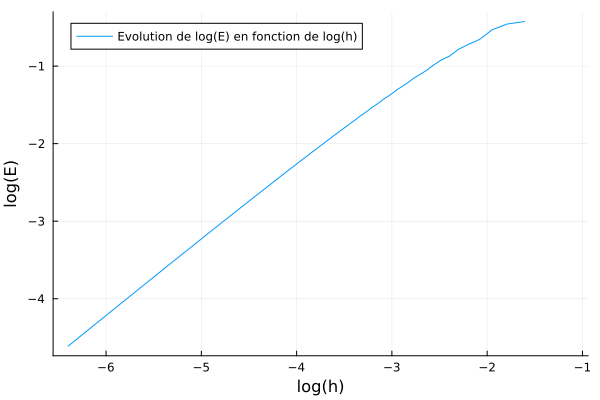

In [18]:
plot(log.(hVectGauss2), log.(errVectGauss2), xlabel = "log(h)", ylabel = "log(E)", label = "Evolution de log(E) en fonction de log(h)")

Il est encore une fois difficile d'estimer l'ordre de la méthode de Gauss. En effet, ici, l'ordre ne devrait pas être proche de 1 (coefficient directeur de $\log(E)$ en fonction de $\log(h)$) mais plus de 3 (ordre attendu pour la méthode de Gauss).

## Un autre exemple

On considère à partir de maintenant l'équation différentielle en dimension 2 :

$$
    \dot{x}_1(t) = x_2(t), \quad \dot{x}_2(t) = - x_1(t).
$$

On peut montrer facilement que la norme de $x(t) = (x_1(t), x_2(t))$ est constante le long des solutions :

$$
    \frac{\mathrm{d}}{\mathrm{d} t} \|x(t)\|^2 = 2\, \left( x(t) \,|\, \dot{x}(t) \right) =  2 \left( x_1(t) x_2(t) - x_2(t) x_1(t) \right) = 0.
$$

### Exercice 4

On considère le problème de Cauchy associé de condition initiale $x_0 = (1, 0)$.

1. Afficher l'approximation de la solution sur $[0, 10]$ pour les méthodes :
- Euler explicite ;
- Euler implicite ;
- Trapèzes ;
- Gauss à 2 étages.
2. Commentaires.

**Attention :** vous ferez un affichage dans le plan $(x_1, x_2)$. Vous fixerez le nombre de pas à $N=100$.

#### Question 1) :

On réimplémente les fonctions pour qu'elles fonctionnent avec des vecteurs et on trace à chaque fois la solution $x_1$ et fonction de $x_2$.

In [19]:
# Etablissement du problème

f1(t,x) = [x[2],-x[1]]      # Second membre f(t, x)

x00 = [1.0,0.0]             # Condition initiale
tspan1 = (0.0, 10.0);       # Intervalle de temps

In [20]:
# Implémentation de la méthode d'Euler explicité
function eulerExp(f, x0, tspan, N)
    t0, tf = tspan
    h = (tf - t0) / N
    t = t0
    x = x0
    ts = [t0]
    xs = [x0]
    for i in 1:N
        x = x + h * f(t,x)
        t = t + h
        push!(ts, t)
        push!(xs, x)
    end
    return ts, xs
end;

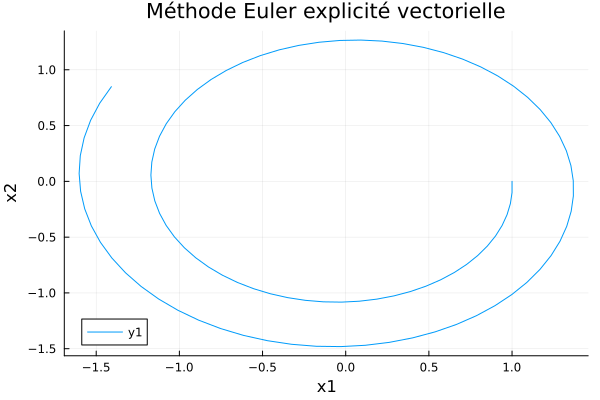

In [21]:
# On appelle notre nouvelle fonction
tsEulerExpVect, xsEulerExpVect = eulerExp(f1, x00, tspan1, 100)
x1EulerExp_values = [x[1] for x in xsEulerExpVect]
x2EulerExp_values = [x[2] for x in xsEulerExpVect]

# Et on trace la solution
plotEulerExp = plot(x1EulerExp_values, x2EulerExp_values, xlabel="x1", ylabel="x2", title="Méthode Euler explicité vectorielle")

In [22]:
# Implémentation des méthodes implicites en vectoriel

function GEulerVect(k, f, xn, tspan, N, n)
    t0, tf = tspan
    h = (tf - t0) / N
    return f(t0 + n*h, xn + h*k)
end;


function GEulerImpVect(y, f, xn, tspan, N, n)
    t0, tf = tspan
    h = (tf - t0) / N
    epsi = 10^(-6)
    while norm((y - GEulerVect(y, f, xn, tspan, N, n))) > epsi
        y = GEulerVect(y, f, xn, tspan, N, n)
    end
    return y
end;


function eulerVect(f, x0, tspan, N)
    t0, tf = tspan
    h = (tf - t0) / N
    t = t0
    x = x0
    ts = [t0]
    xs = [x0]
    #push!(xs, x)
    for i in 1:N
        y = f(i*h,x)
        y = GEulerImpVect(y, f, x, tspan, N, i)
        y = x + h*y # UPDATED -> NOUVELLE VERSION : x = x + h * G(x?)
        t = t + h # UPDATED
        x = y
        push!(ts, t)
        push!(xs, y)
    end
    return ts, xs
end;

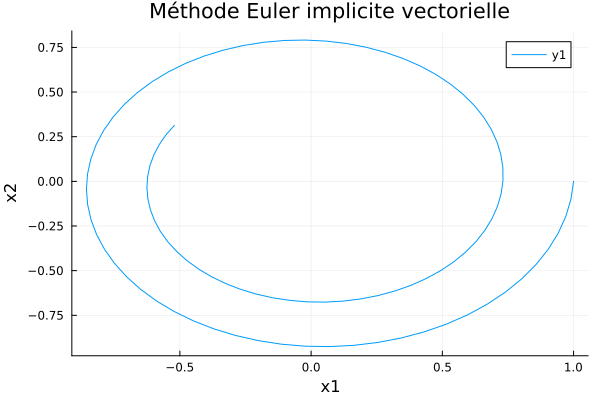

In [23]:
# On appelle notre nouvelle fonction
tsEulerVect, xsEulerVect = eulerVect(f1, x00, tspan1, 100)
x1Euler_values = [x[1] for x in xsEulerVect]
x2Euler_values = [x[2] for x in xsEulerVect]

# Et on trace la solution
plotEulerImp = plot(x1Euler_values, x2Euler_values, xlabel="x1", ylabel="x2", title="Méthode Euler implicite vectorielle")

In [25]:
function GTrapezesVect(k, f, xn, tspan, N, n)
    t0, tf = tspan
    h = (tf - t0) / N
    k1, k2 = k[1], k[2]
    return [f(t0 + n*h, xn), f(t0 + n*h, xn + h*k2)]
end;


function GTrapezesImpVect(kinit, f, xn, tspan, N, n)
    t0, tf = tspan
    h = (tf - t0) / N
    epsi = 10^(-6)
    k = kinit
    while norm(k - GTrapezesVect(k, f, xn, tspan, N, n)) > epsi
        k = GTrapezesVect(k, f, xn, tspan, N, n)
    end
    return k
end;


function trapezesVect(f, x0, tspan, N)
    t0, tf = tspan
    h = (tf - t0) / N
    t = t0
    x = x0
    ts = [t0]
    xs = [x0]
    for i in 1:N
        k = [f(i*h,x), (1/2)*f(i*h,x)]
        k = GTrapezesImpVect(k, f, x, tspan, N, i)
        k1, k2 = k
        y = x + h * ((1/2)*k1 + (1/2)*k2)
        t = t + h
        x = y
        push!(ts, t)
        push!(xs, y)
    end
    return ts, xs
end;

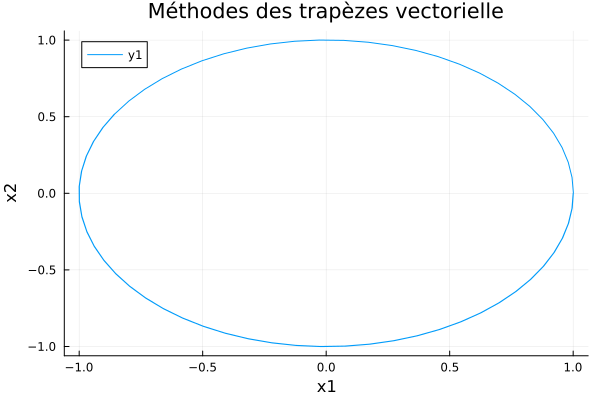

In [26]:
# On appelle notre nouvelle fonction
tsTrapezesVect, xsTrapezesVect = trapezesVect(f1, x00, tspan1, 100)
x1Trapezes_values = [x[1] for x in xsTrapezesVect]
x2Trapezes_values = [x[2] for x in xsTrapezesVect]

# Et on trace la solution
plotTrapezes = plot(x1Trapezes_values, x2Trapezes_values, xlabel="x1", ylabel="x2", title="Méthodes des trapèzes vectorielle")

In [27]:
function GGauss2Vect(k, f, xn, tspan, N, n)
    t0, tf = tspan
    h = (tf - t0) / N
    k1, k2 = k[1], k[2]
    return [f(t0 + n*h + c1*h, xn + h*(a11*k1 + a12*k2)), f(t0 + n*h + c2*h, xn + h*(a21*k1 + a22*k2))]
end;


function GGauss2ImpVect(kinit, f, xn, tspan, N, n)
    t0, tf = tspan
    h = (tf - t0) / N
    epsi = 10^(-6)
    k = kinit
    while norm(k - GGauss2Vect(k, f, xn, tspan, N, n)) > epsi
        k = GGauss2Vect(k, f, xn, tspan, N, n)
    end
    return k
end;


function gauss2Vect(f, x0, tspan, N)
    t0, tf = tspan
    h = (tf - t0) / N
    t = t0
    x = x0
    ts = [t0]
    xs = [x0]
    for i in 1:N
        k = [f(i*h,x), (1/2)*f(i*h,x)]
        k = GGauss2ImpVect(k, f, x, tspan, N, i)
        k1, k2 = k
        y = x + h * ((1/2)*k1 + (1/2)*k2)
        t = t + h
        x = y
        push!(ts, t)
        push!(xs, y)
    end
    return ts, xs
end;

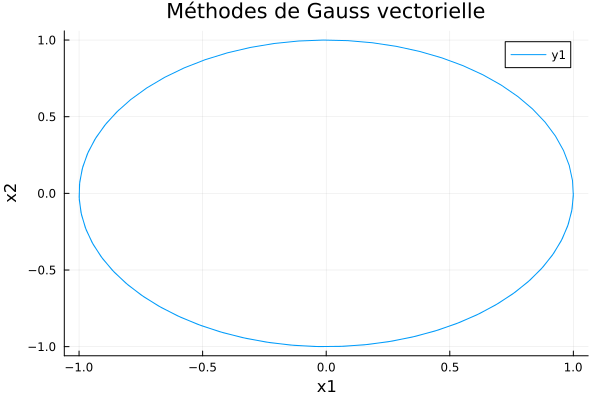

In [28]:
# On appelle notre nouvelle fonction
tsGauss2Vect, xsGauss2Vect = gauss2Vect(f1, x00, tspan1, 100)
x1Gauss2_values = [x[1] for x in xsGauss2Vect]
x2Gauss2_values = [x[2] for x in xsGauss2Vect]

# Et on trace la solution
plotGauss2 = plot(x1Gauss2_values, x2Gauss2_values, xlabel="x1", ylabel="x2", title="Méthodes de Gauss vectorielle")

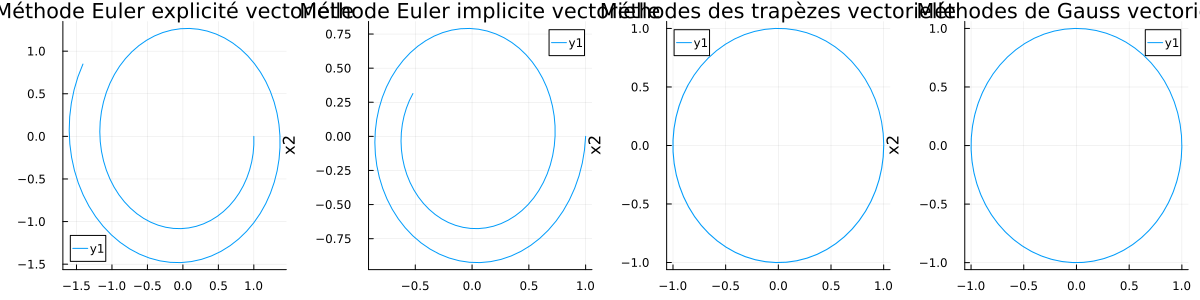

In [29]:
plot(plotEulerExp, plotEulerImp, plotTrapezes, plotGauss2, layout=(1,4), size=(1200, 300))

#### Question 2) :

On remarque cette fois-ci que les méthode les plus fidèles pour une même valeur de N (et donc de h) semblent être les méthode des trapèzes et de Gauss. Par ailleurs, si on prend une valeur de N plus petite (par exemple $N = 30$), on trouve que la méthode de Gauss donne un résultat plus satisfaisant (elle semble converger plus rapidement que les autres méthodes).